# Session 8 - Locality Sensitive Hashing

In this sesion we will play with locality sensitive hashing for retrieving the closer image from a dataset of images to a given one.

The dataset consists of handwritten digits [0..9]. Each one is represented as a matrix of greyscale pixels.

In [1]:
import numpy as np

data = np.load('images.npy')
data[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

We can also plot them as images

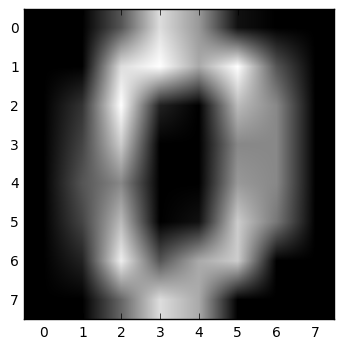

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0], cmap=plt.cm.gray)

You have available the implementation of a class that computes LSH for this images in the file ```lsh.py```.

As an ilustration, the next cell shows an example of how to retrieve similar images to a given one using LSH for this dataset. 

Function ```search``` has three parameters, $k$ is the number of bytes used in the hash function, $m$ is the number of hash functions used to index the images, $i$ is the number of the image to use for the search.

You can observe the time taken to retrieve the candidate images and the number of candidates as $k$ and $m$ change.

The cell also shows the original image and the first of the candidate images (it does not have to be the closest one).

Your can play a little bit with the parameters. 

Your **next task** is to read the documentation for the session and understand how the ```lsh``` class works. After that you can complete the tasks from section 4 in the documentation.

In [5]:
from lsh import lsh

def plot_first_image(lcand):
    if len(lcand) != 0:
        print("Hamming dist=", np.sum(np.abs(data[i+1500]-data[list(lcand)[0]])))       
        fig = plt.figure()
        fig.set_figwidth(30)
        fig.set_figheight(30)
        sp1 = fig.add_subplot(1,2,1)
        sp1.imshow(data[i+1500], cmap=plt.cm.gray)
        sp1 = fig.add_subplot(1,2,2)
        sp1.imshow(data[list(lcand)[0]], cmap=plt.cm.gray)
        plt.show()

def search(k, m, i):
    """
    Search for a candidate for image i using k bits and m hash funcions
    """
    if i + 1500 < data.shape[0]:
        me = lsh(k, m)
        im = me.data[i+1500]
        cands = me.candidates(im)
        print ("there are %4d candidates for image %4d" % (len(cands), i))
        return(cands)
    

there are  130 candidates for image    0
CPU times: user 252 ms, sys: 10.7 ms, total: 263 ms
Wall time: 279 ms
Hamming dist= 209.0


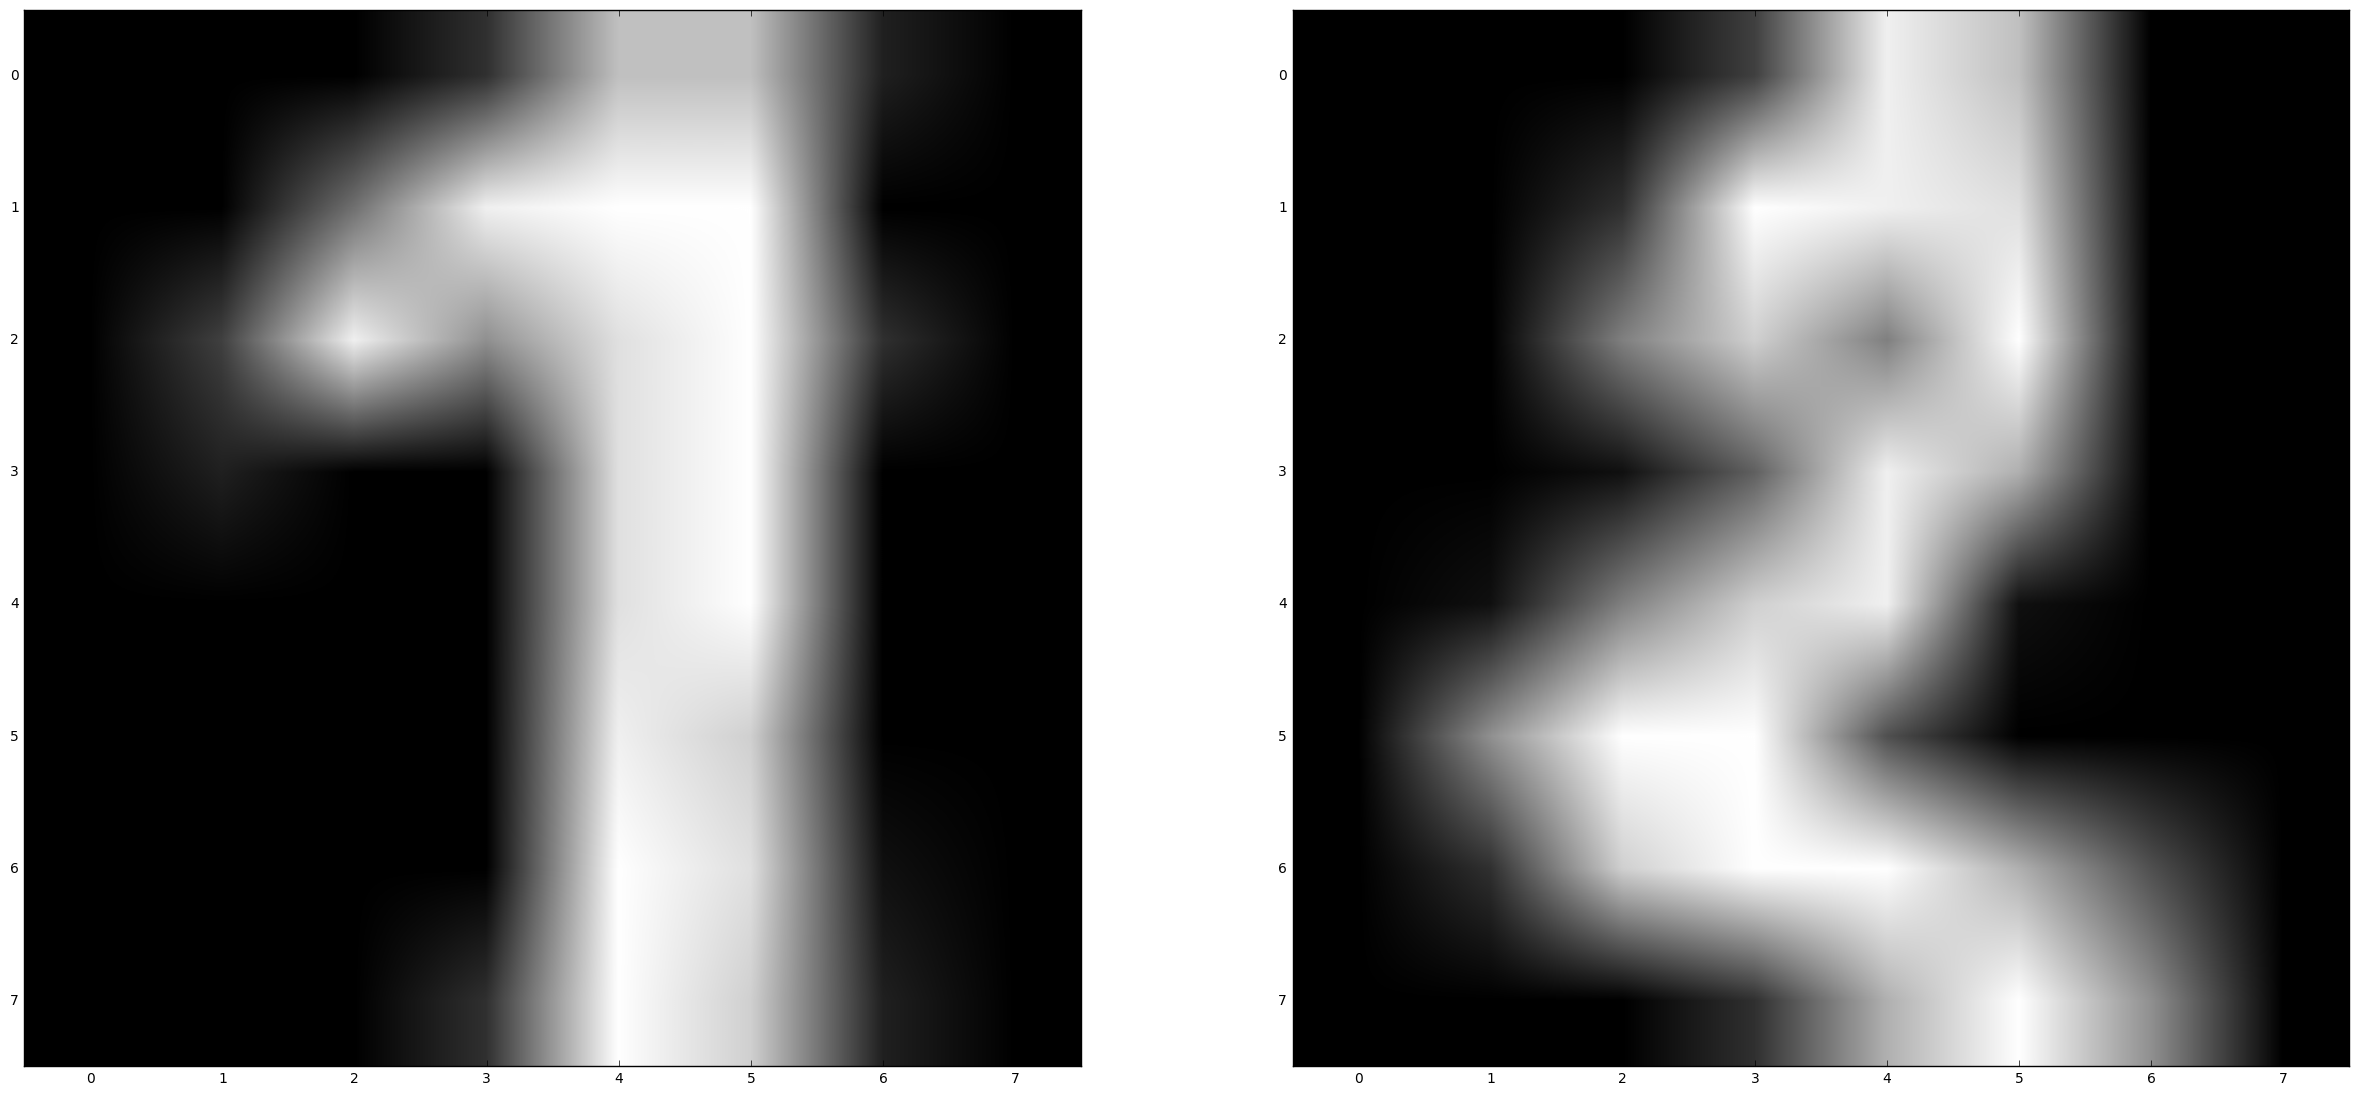

In [6]:
i=0 # The number of image to do the search
%time lcand = search(20,5,i)

plot_first_image(lcand)

there are  278 candidates for image    0
CPU times: user 659 ms, sys: 19.7 ms, total: 678 ms
Wall time: 684 ms
Hamming dist= 209.0


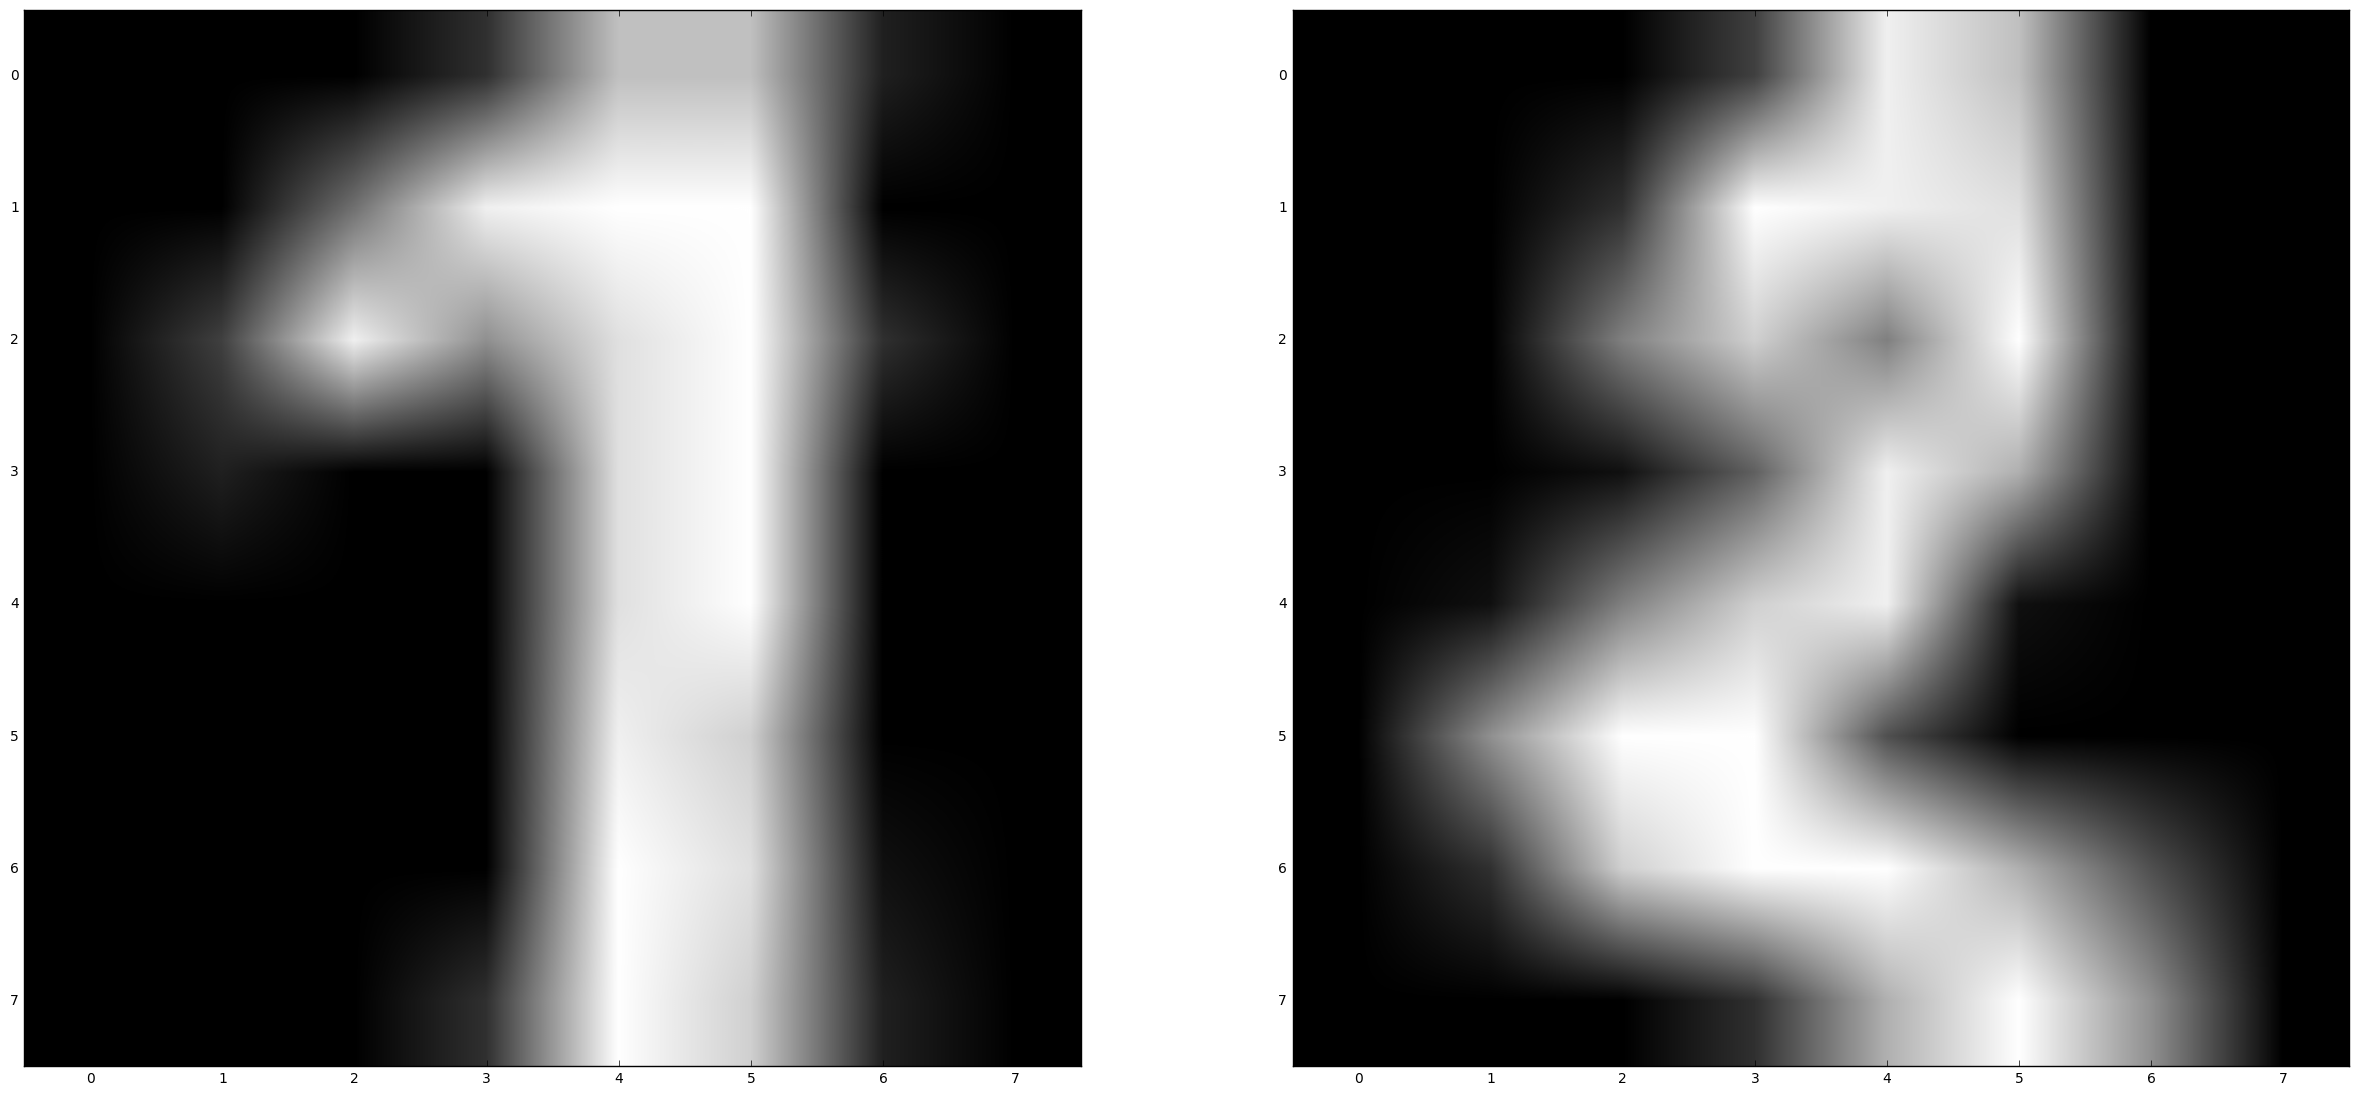

In [7]:
%time lcand = search(20,15,i)

plot_first_image(lcand)

In [ ]:
%time lcand = search(40,5,i)

plot_first_image(lcand)

In [ ]:
%time lcand = search(40,15,i)

plot_first_image(lcand)